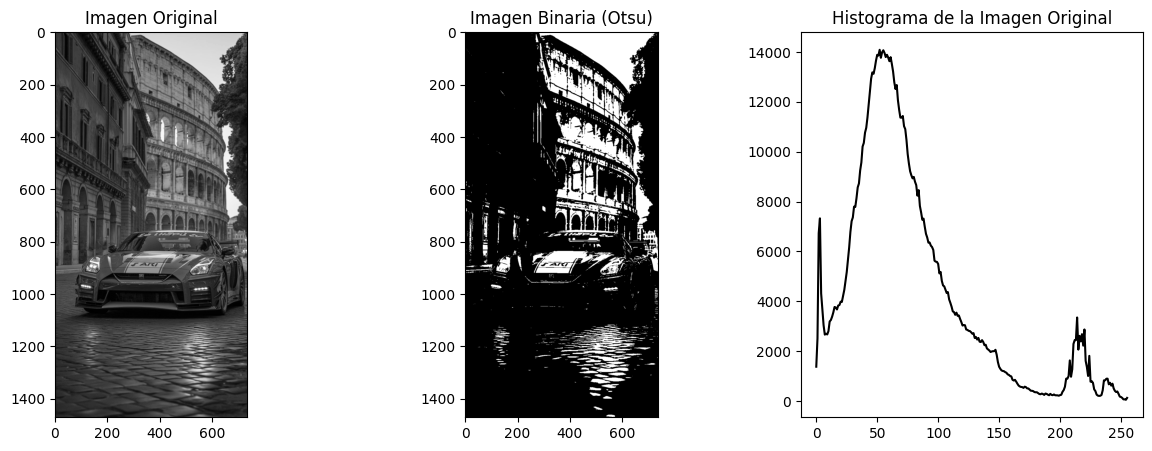

In [2]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('Ricoauto.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar umbralización de Otsu
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calcular y mostrar el histograma
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binaria (Otsu)')

plt.subplot(1, 3, 3)
plt.plot(histogram, color='black')
plt.title('Histograma de la Imagen Original')

plt.show()


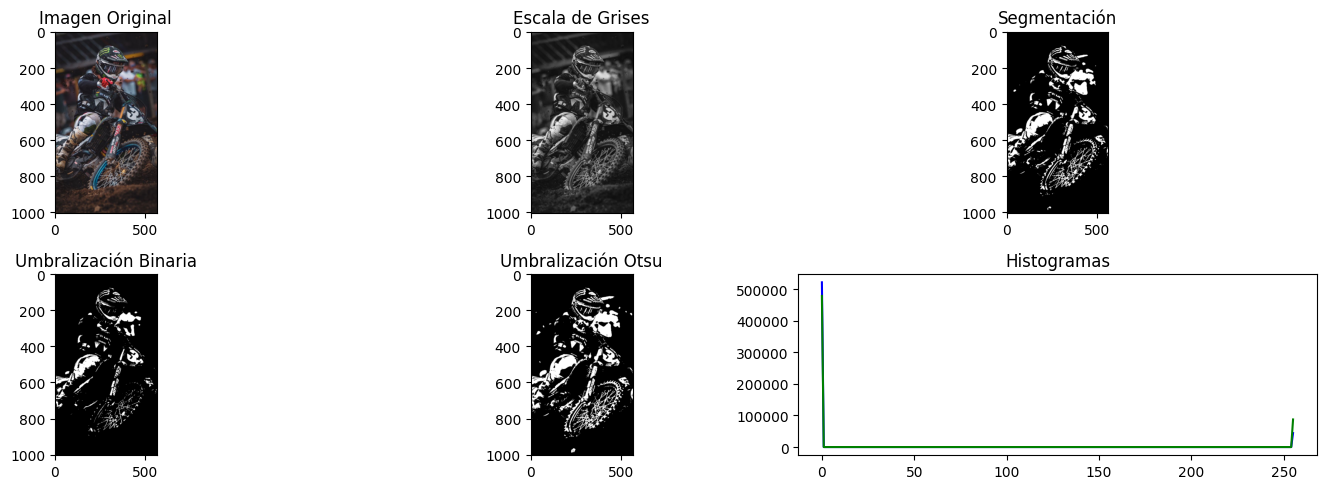

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para procesar la imagen
def procesar_imagen(imagen):
    # Conversión a escala de grises
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Segmentación (ajusta los parámetros según sea necesario)
    _, segmentacion = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    # Umbralización binaria
    _, binaria = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Histograma de umbralización binaria
    hist_binaria = cv2.calcHist([binaria], [0], None, [256], [0, 256])

    # Umbralización por método de Otsu
    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Histograma de umbralización por método de Otsu
    hist_otsu = cv2.calcHist([otsu], [0], None, [256], [0, 256])

    # Mostrar los resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')

    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Escala de Grises')

    plt.subplot(2, 3, 3)
    plt.imshow(segmentacion, cmap='gray')
    plt.title('Segmentación')

    plt.subplot(2, 3, 4)
    plt.imshow(binaria, cmap='gray')
    plt.title('Umbralización Binaria')

    plt.subplot(2, 3, 5)
    plt.imshow(otsu, cmap='gray')
    plt.title('Umbralización Otsu')

    plt.subplot(2, 3, 6)
    plt.plot(hist_binaria, color='blue')
    plt.plot(hist_otsu, color='green')
    plt.title('Histogramas')

    plt.tight_layout()
    plt.show()

# Cargar la imagen
imagen = cv2.imread('Motorica.jpg')

# Procesar la imagen
procesar_imagen(imagen)



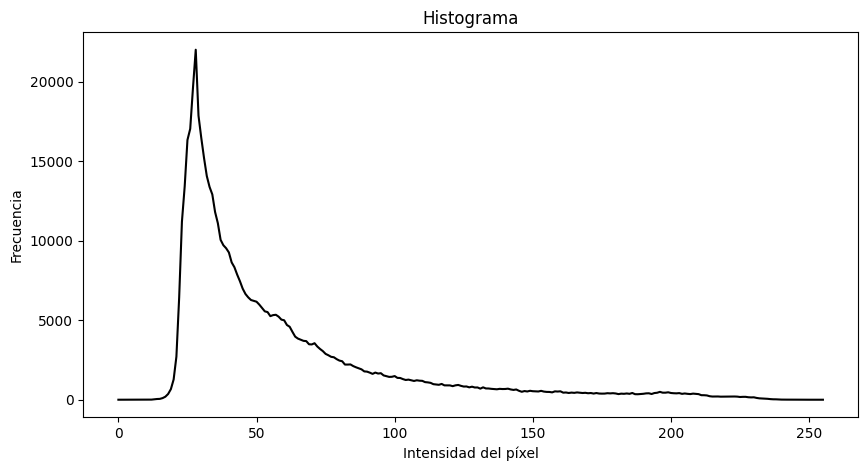

In [8]:
import cv2
import matplotlib.pyplot as plt

def histograma(imagen):
    histo = cv2.calcHist([imagen], [0], None, [256], [0, 256])

    plt.figure(figsize=(10, 5))
    plt.plot(histo, color="black")
    plt.title('Histograma')
    plt.xlabel('Intensidad del píxel')
    plt.ylabel('Frecuencia')
    plt.show()

# Cargar la imagen
imagen = cv2.imread('Motorica.jpg', 0)  # Lee la imagen en escala de grises

# Mostrar el histograma
histograma(imagen)



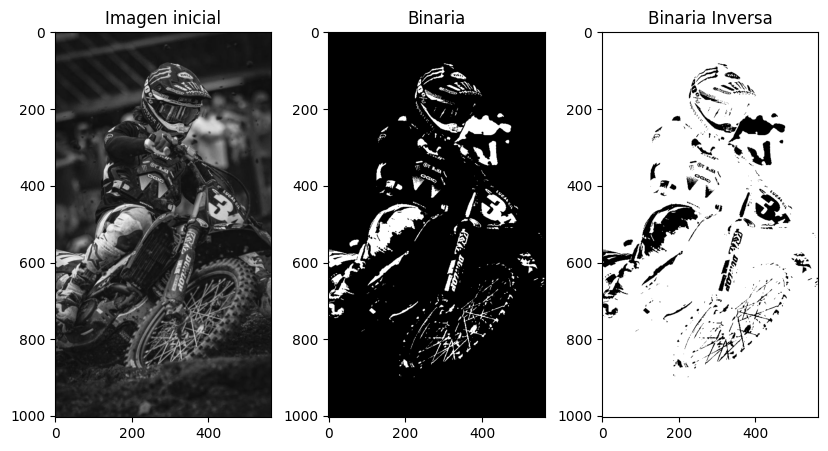

In [2]:
import cv2 
import matplotlib.pyplot as plt

imagen = cv2.imread('Motorica.jpg', 0)
_, umbral_bi = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
_, umbral_inc_bi = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10, 5))  # Corregir la función figsize

plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen inicial')

plt.subplot(1, 3, 2)
plt.imshow(umbral_bi, cmap='gray')
plt.title('Binaria')

plt.subplot(1, 3, 3)
plt.imshow(umbral_inc_bi, cmap='gray')
plt.title('Binaria Inversa')

plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función que aplica la umbralización global con el algoritmo de Isodata
def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        groupo1 = image[image <= threshold] if image is not None else np.array([])  # Manejo de error para None
        groupo2 = image[image > threshold] if image is not None else np.array([])  # Manejo de error para None
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2  # según la fórmula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
    
    return threshold

# Intentar leer la imagen
imagen = cv2.imread('Motorica,jpg', 0)


if imagen is None:
    print("Error al leer la imagen.")
else:
    print("Imagen leída correctamente.")
    # llamamos a funcion con imagen seleccionada 
    umbral_isodata = isodata(imagen)

    # Umbralización de la imagen
    _, imagen_umbralizada = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY)

    # Mostramos la imagen original y la imagen umbralizada
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 2, 2)
    plt.imshow(imagen_umbralizada, cmap='gray')
    plt.title('Umbralización con Isodata')

    plt.show()


Error al leer la imagen.


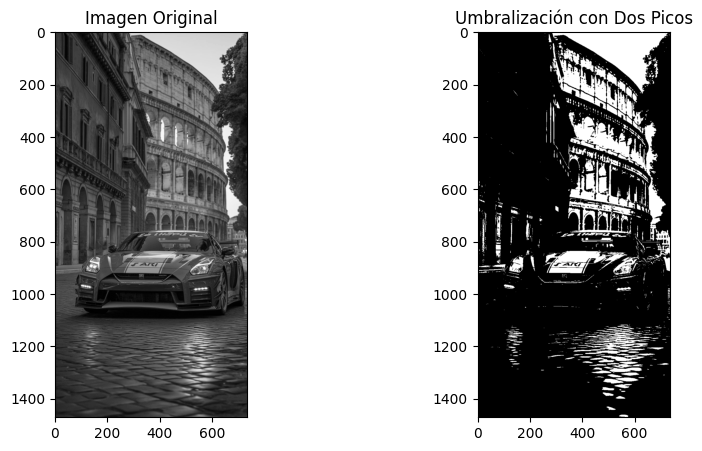

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la umbralización global con el algoritmo de dos picos
def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral

# Cargamos la imagen en escala de grises
imagen = cv2.imread('Ricoauto.jpg', 0)

# Aplicamos la umbralización global con el algoritmo de dos picos
umbral_dos_picos = dos_picos(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_dos_picos, 255, cv2.THRESH_BINARY)

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Dos Picos')


plt.show()

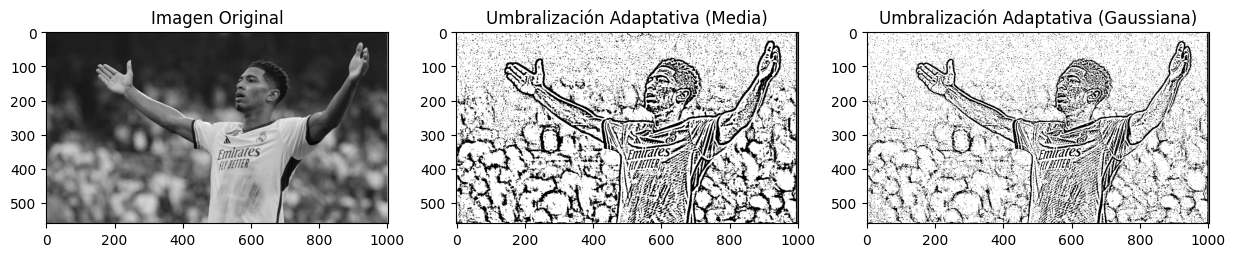

In [5]:
import cv2 
import matplotlib.pyplot as plt

imagen = cv2.imread('Bellingol.jpg', 0)

# Especifica un tamaño de bloque (debe ser un número impar)
block_size = 11

umb_adap = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, 2)
umb_adap_gauss = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, 2)

# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(umb_adap, cmap='gray')
plt.title('Umbralización Adaptativa (Media)')

plt.subplot(1, 3, 3)
plt.imshow(umb_adap_gauss, cmap='gray')
plt.title('Umbralización Adaptativa (Gaussiana)')

plt.show()

